In [1]:
import pandas as pd
import seaborn as sns
import plotly.express as px

In [2]:
df_tsi = pd.read_csv (r'C:\devsbb\ROTH_AND_JOOS_CP2013.dat',comment='#', header=None, delimiter="\s+",usecols=[0,5]).rename(columns = {0 : "year", 5 : "TSI"})

<AxesSubplot:xlabel='year'>

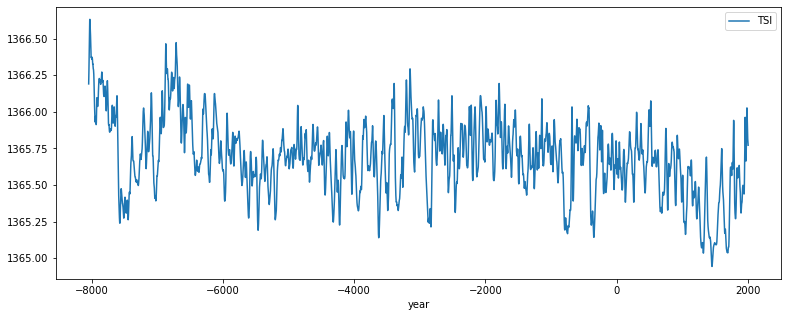

In [3]:
df_tsi.plot(x= "year", y = "TSI",figsize=(13,5))

<AxesSubplot:xlabel='year'>

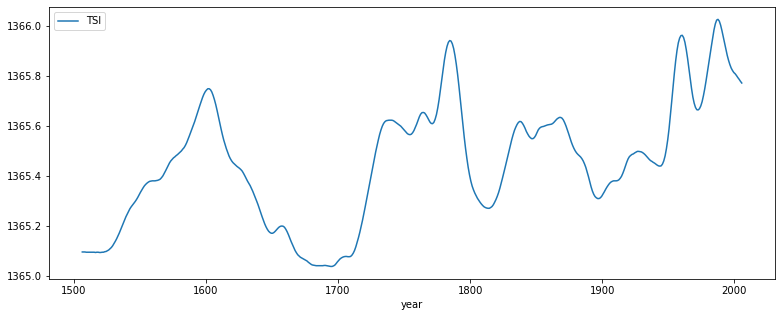

In [4]:
# letzte 500 Jahre
df_tsi[-500:].plot(x= "year", y = "TSI",figsize=(13,5))

## Autoregressive  Model

In [56]:
df_tsi_crop = df_tsi[df_tsi.year>-1000].copy(True).set_index('year')

In [57]:
df = df_tsi_crop
#df['time_index'] = range(len(df_tsi_crop))

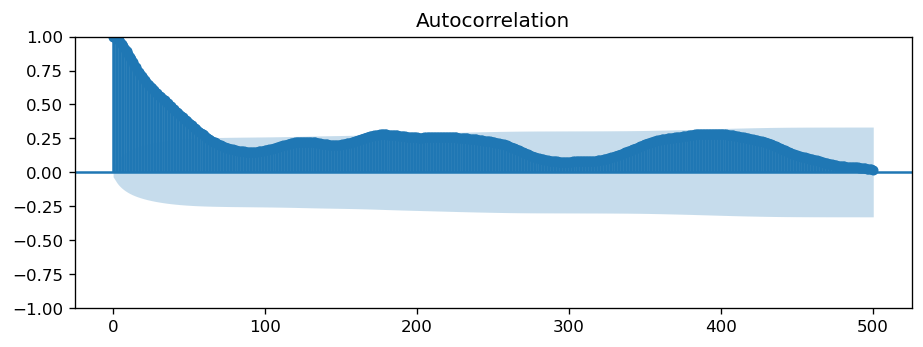

In [58]:
from statsmodels.graphics.tsaplots import plot_acf
from matplotlib import pyplot
plot_acf(df['TSI'], lags=500)
pyplot.show()

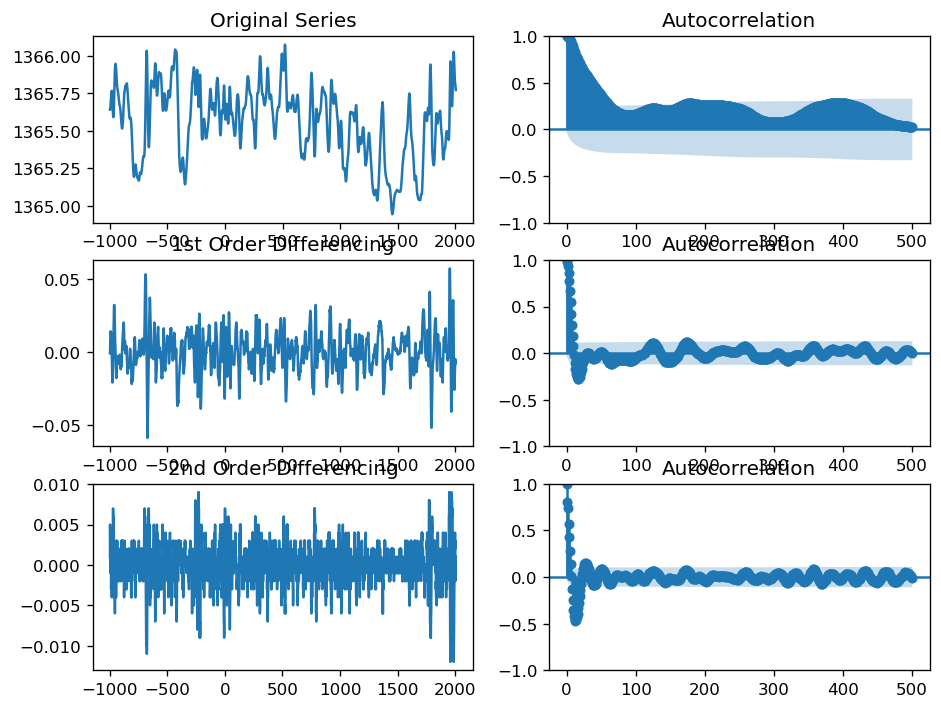

In [59]:
import matplotlib.pyplot as plt
plt.rcParams.update({'figure.figsize':(9,7), 'figure.dpi':120})

# Original Series
fig, axes = plt.subplots(3, 2, sharex=False)
axes[0, 0].plot(df['TSI']); axes[0, 0].set_title('Original Series')
plot_acf(df['TSI'], ax=axes[0, 1], lags=500)

# 1st Differencing
axes[1, 0].plot(df['TSI'].diff()); axes[1, 0].set_title('1st Order Differencing')
plot_acf(df['TSI'].diff().dropna(), ax=axes[1, 1], lags=500)

# 2nd Differencing
axes[2, 0].plot(df['TSI'].diff().diff()); axes[2, 0].set_title('2nd Order Differencing')
plot_acf(df['TSI'].diff().diff().dropna(), ax=axes[2, 1], lags=500)

plt.show()

In [60]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

C:\devsbb\Anaconda3\envs\myEnv38\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


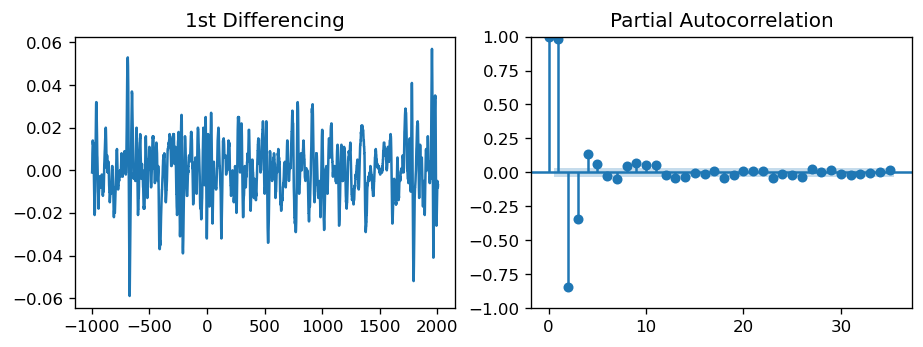

In [61]:
# PACF plot of 1st differenced series
plt.rcParams.update({'figure.figsize':(9,3), 'figure.dpi':120})

fig, axes = plt.subplots(1, 2, sharex=False)
axes[0].plot(df['TSI'].diff()); axes[0].set_title('1st Differencing')
axes[1].set(ylim=(0,5))
plot_pacf(df['TSI'].diff().dropna(), ax=axes[1])

plt.show()

### AR

In [62]:
from statsmodels.tsa.ar_model import AutoReg
from sklearn.metrics import mean_squared_error
from math import sqrt

In [63]:
testlen = 150
# split dataset
X = df['TSI'].values
train, test = X[1:len(X)-testlen], X[len(X)-testlen:]

In [84]:
model = AutoReg(train, lags=1200, trend = "n", hold_back = None)
model_fit = model.fit()

In [85]:
predictions = model_fit.predict(start=len(train), end=len(train)+len(test)-1, dynamic=False)

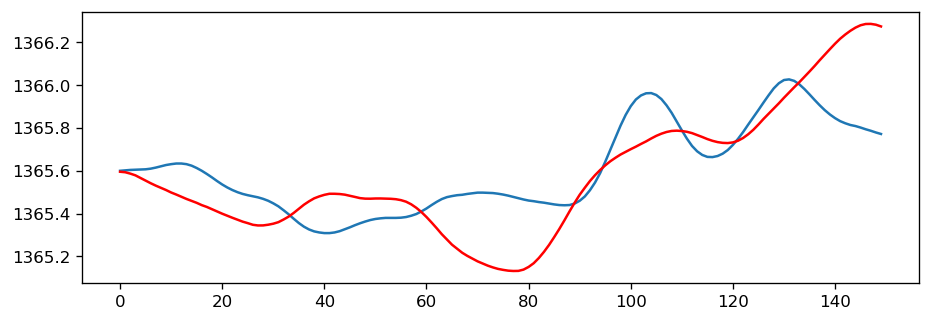

In [86]:
#for i in range(len(predictions)):
    #print('predicted=%f, expected=%f' % (predictions[i], test[i]))
rmse = sqrt(mean_squared_error(test, predictions))
#print('Test RMSE: %.3f' % rmse)
# plot results
pyplot.plot(test)
#pyplot.plot(train)
pyplot.plot(predictions, color='red')
pyplot.show()

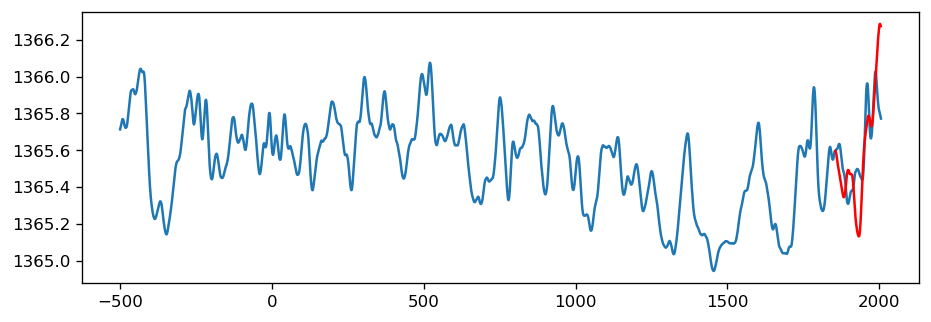

In [87]:
import numpy as np

# Forecast
fc = model_fit.predict(start=len(train), end=len(train)+len(test)-1, dynamic=False)
index_of_fc = np.arange(df.index[-1]-testlen, df.index[-1])

# make series for plotting purpose
fc_series = pd.Series(fc, index=index_of_fc)

# Plot
plt.plot(df['TSI'][-500:], label = "TSI")
plt.plot(fc_series, color='red', label = "Prediction")


plt.show()

### ARIMA

In [19]:
from statsmodels.tsa.arima.model import ARIMA

In [20]:
model = ARIMA(train, order=(100,1,1))
model_fit = model.fit()
print(model_fit.summary())
predictions = model_fit.predict(start=len(train), end=len(train)+len(test)-1, dynamic=False)

KeyboardInterrupt: 

In [ ]:
rmse = sqrt(mean_squared_error(test, predictions))
pyplot.plot(test)
pyplot.plot(predictions, color='red')
pyplot.show()